In [1]:

import numpy as np
from matplotlib import pyplot as plt

import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import uniform
import scipy.stats
from scipy import optimize

In [2]:
from astroML import stats as astroMLstats
from sklearn.neighbors import KernelDensity

In [3]:
def M_irriducible (m, chi):
    return m * ((1+(1-chi**2)**0.5)/2)**0.5

In [4]:
mu = 1
sigma = 0.02
N=1000
mass = np.random.normal (mu, sigma, size = N)

In [5]:
spin = np.random.uniform(0,1, N)
#plt.hist(spin, bins=int(1000**0.5), density=True)

In [8]:
M_irr = M_irriducible(mass, spin)
print(M_irr)

[0.91420697 0.92469577 0.92010895 0.91786723 0.85480168 0.80761278
 1.01433222 0.89289958 0.95203515 0.94529884 0.90478862 0.80455616
 0.86344468 0.96607376 0.99497083 0.91252375 0.93296138 0.99999616
 0.99500965 0.84109714 0.87998807 0.90042059 0.95454148 0.98745852
 0.98828324 0.91254626 1.02703547 0.99373585 0.95935897 0.997916
 1.01527998 0.95227853 0.98986055 0.98270097 0.96122343 0.9697859
 0.92302134 0.93112627 0.98687788 0.84643046 0.97305075 0.97947506
 1.02466165 0.92641245 0.98754968 0.85058245 0.99814079 0.99280189
 0.97237687 0.85047935 0.94955331 0.87607515 0.99977962 0.97949481
 0.98936339 1.02852073 0.85156296 0.94421354 0.93495109 0.92247225
 0.86698209 0.97374284 1.0134345  0.8676164  0.96782909 0.94303951
 0.81987995 0.88199241 0.88987374 0.97638    0.95115153 0.91151976
 0.93183622 0.97027788 0.90062025 0.9656844  1.01043499 0.93374319
 1.01360317 0.92764673 0.89712782 0.87305356 1.01328892 0.98603858
 0.86173361 0.99303194 0.99826268 0.98974211 1.04889522 0.9564550

## Bin with the random method that I've always used

(array([0.36709707, 0.45887134, 0.2753228 , 0.55064561, 0.73419414,
        0.64241987, 0.82596841, 1.37661402, 1.65193682, 1.46838829,
        1.65193682, 2.5696795 , 1.46838829, 2.2943567 , 3.21209937,
        3.02855084, 3.12032511, 4.58871339, 5.50645607, 5.04758473,
        4.77226193, 6.42419875, 8.35145837, 9.72807239, 9.45274959,
        6.42419875, 3.39564791, 1.46838829, 0.64241987, 0.18354854,
        0.09177427]),
 array([0.72823403, 0.73913033, 0.75002663, 0.76092293, 0.77181923,
        0.78271553, 0.79361183, 0.80450813, 0.81540443, 0.82630073,
        0.83719703, 0.84809333, 0.85898963, 0.86988593, 0.88078223,
        0.89167853, 0.90257483, 0.91347113, 0.92436744, 0.93526374,
        0.94616004, 0.95705634, 0.96795264, 0.97884894, 0.98974524,
        1.00064154, 1.01153784, 1.02243414, 1.03333044, 1.04422674,
        1.05512304, 1.06601934]),
 <BarContainer object of 31 artists>)

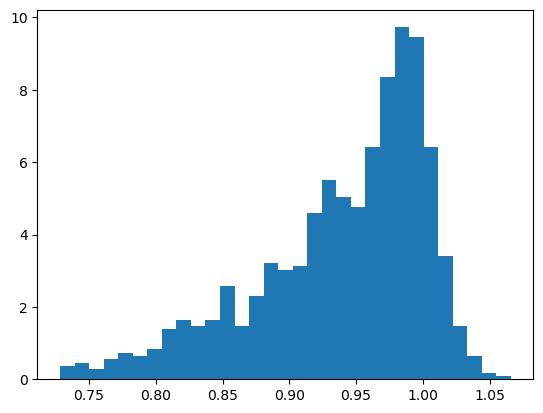

In [7]:
plt.hist(M_irr, bins=int(1000**0.5), density=True)

## Bin with the  "Freedman-Diaconis rule":

In [29]:
sigmaG2 = astroMLstats.sigmaG(M_irr)

In [30]:
binsize = 2.7*sigmaG2/(N**(1/3))
print(binsize)
binsG = np.append(np.arange(start=M_irr.min(), stop=M_irr.max(), step=binsize) , M_irr.max()) 

0.016281920017535666


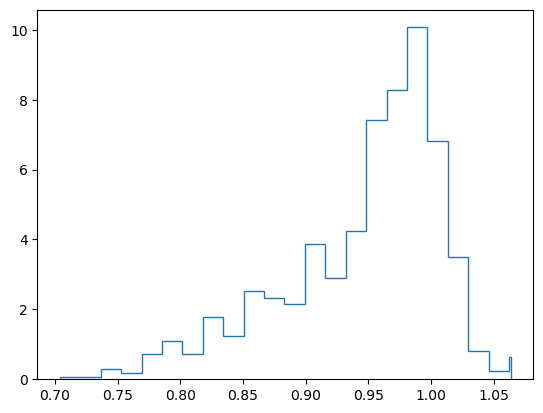

In [31]:
_ = plt.hist(M_irr, bins=binsG, density=True, histtype="step") 

## Bin with the  "Scott's rule":

In [32]:
sigmaS = np.std(M_irr)

In [33]:
binsize = 3.5*sigmaS/(N**(1/3))
print(binsize)
binsS = np.append(np.arange(start=M_irr.min(), stop=M_irr.max(), step=binsize) , M_irr.max()) 

0.022141030946026232


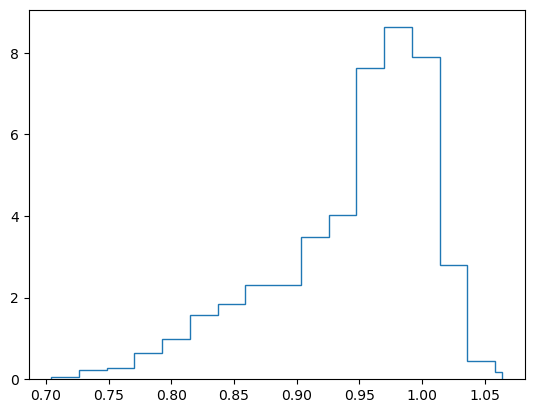

In [34]:
_ = plt.hist(M_irr, bins=binsS, density=True, histtype="step") 

## KDE (PUNTO 3)